# Лабораторная работа 4 Курбанов Джурат AIN-1-21


## Набор данных по распознованию вин

In [36]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()

## Изучение данных

In [37]:
# Данные и их описание
print(wine.DESCR)

# DataFrame для анализа
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Выведем первые несколько строк данных
data.head()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [38]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Иследование данных с помощью визуализации

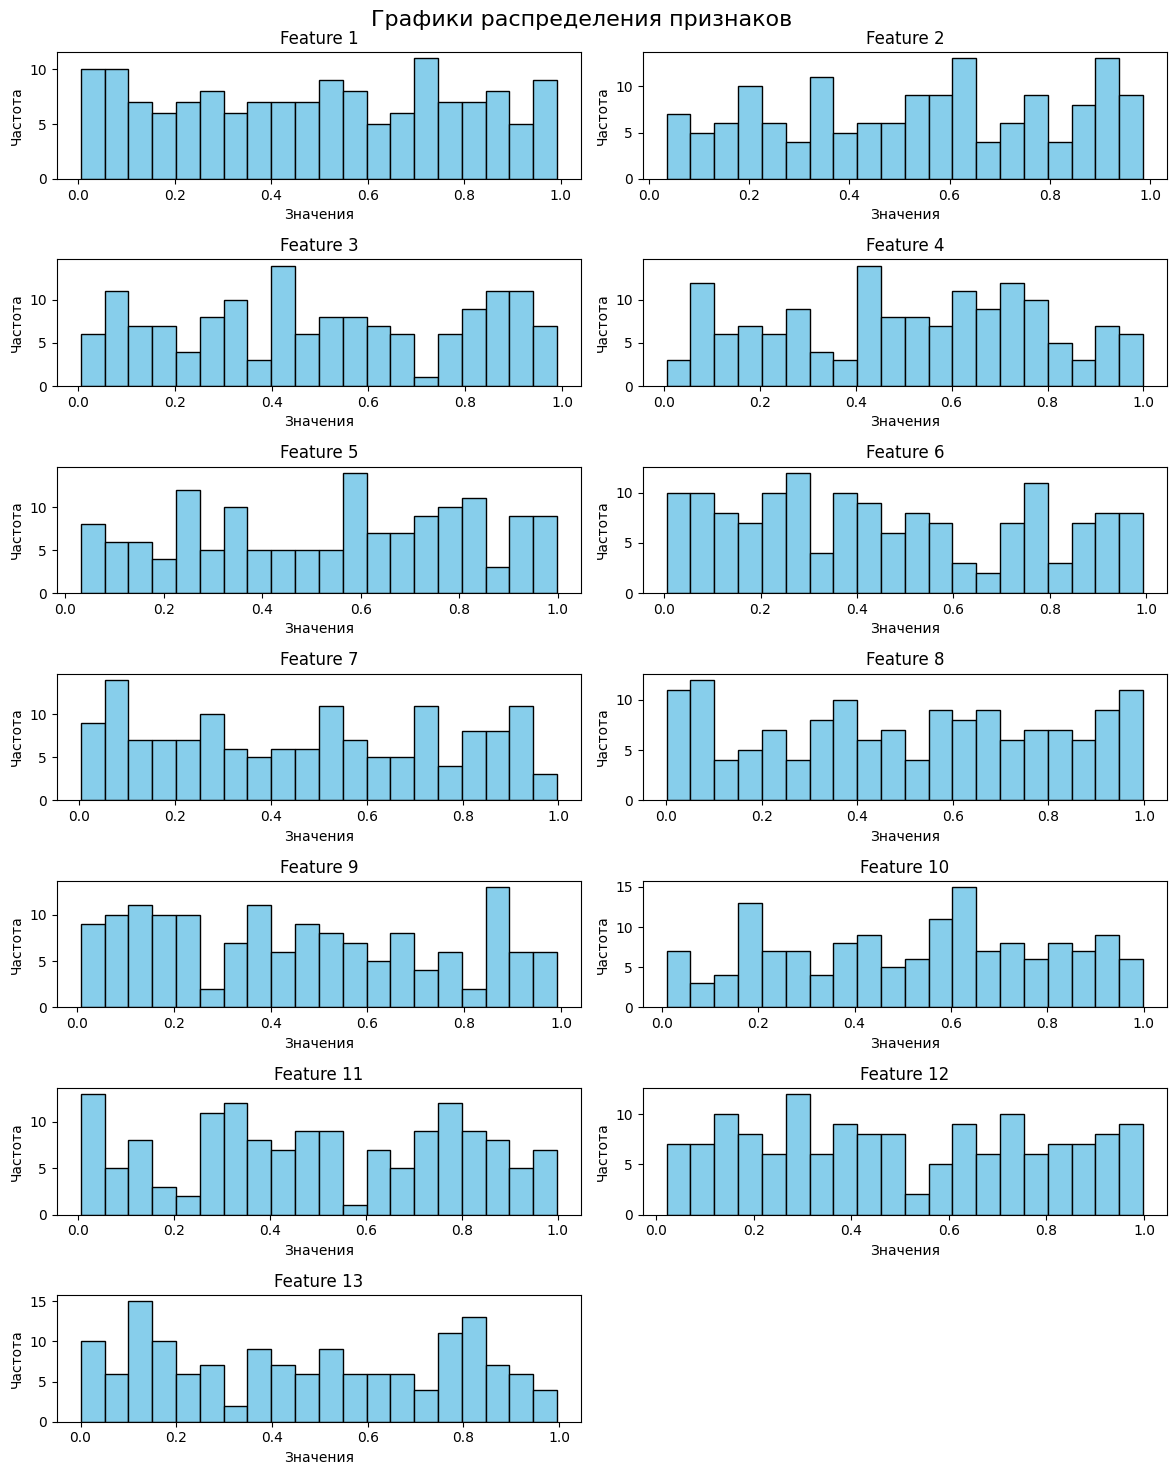

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Создадим случайные данные для демонстрации
data = np.random.rand(150, 13)
wine_feature_names = ["Feature " + str(i) for i in range(1, 14)]

num_features = len(wine_feature_names)
rows = num_features // 2 + 1

fig, axes = plt.subplots(rows, 2, figsize=(12, 15))
fig.suptitle("Графики распределения признаков", fontsize=16)

for i, feature in enumerate(wine_feature_names):
    ax = axes[i // 2, i % 2]
    ax.hist(data[:, i], bins=20, edgecolor='black', color='skyblue')
    ax.set_title(feature)
    ax.set_xlabel("Значения")
    ax.set_ylabel("Частота")

# Уберем лишние пустые графики, если их количество не делится на 2
for i in range(num_features, rows * 2):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()





